In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = [45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24, 35.1, 7.6, 32.9, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5, 29.3, 16.7, 27.1, 16, 28.3, 17.4, 1.5, 20, 1.4, 4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7]

y = [69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2, 24.2, 4, 65.9, 7.2, 46, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2, 18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30, 0.3, 7.4, 8.5, 5, 45.7, 35.1, 32, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9, 36.8]

z = [9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7, 19, 24.4, 11.3, 14.6, 18, 12.5, 5.6, 15.5, 9.7, 12, 15, 15.9, 18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7]

X = np.mat([x, y]).T

Y = np.mat([z]).T
X = np.insert(X, 0, np.ones(46), 1)
print('X=\n',X.shape)
print('X.I=\n',X.I.shape)
print('y=\n',Y.shape)
W = X.I * Y
#W2 = X.I.T * Y
print("w1=\n",W)
#print("w2=\n",W2)
LR = lambda x, y: W[0, 0] + W[1, 0] * x + W[2, 0] * y

#畫圖輸出結果

x2 = y2 = np.arange(0, 60.0)
X, Y = np.meshgrid(x2, y2)
zs = np.array([LR(x2,y2) for x2,y2 in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

a=np.array([[1,2],
            [3,4]])
b=np.array([[4,3],
            [2,1]])
print('mul=',a*b)



X=
 (46, 3)
X.I=
 (3, 46)
y=
 (46, 1)
w1=
 [[11.7172528 ]
 [ 0.24620556]
 [-0.10584109]]
mul= [[4 6]
 [6 4]]


y=
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
random=
 [0.31923141 0.03586183 0.28280953 0.57614726 0.31448092 0.40573808
 0.946315   0.30878966 0.96973075 0.79698771 0.58137029 0.96650822
 0.50079841 0.63995554 0.68865534]


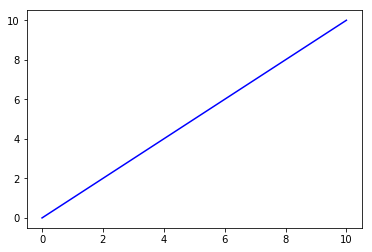

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Target function line

X = np.linspace(0, 10,20)
f = lambda x: x #y=x
F = np.vectorize(f)
Y = F(X)
#print('y=\n',Y)
#random data by F(X) + random residual(upper bound=2)

num = 15 #number of data

random_sign = np.vectorize(lambda x: x if np.random.sample() > 0.5 else -x)
data_X = np.linspace(1, 9, num)
data_Y = random_sign(np.random.sample(num) * 2) + F(data_X)
print('random=\n',np.random.sample(num))
plt.plot(X, Y, 'b')
plt.show()


In [29]:
from sympy import *
a, b = symbols('a b')
residual = 0
#residualSum 求殘差

for i in range(num):
    residual += (Y[i] - (a * X[i] + b)) ** 2

#展開觀看方程式內容

print('residul=',expand(residual))
#對a微分

f1 = diff(residual, a)
#對b微分

f2 = diff(residual, b)
print('f1=',f1)
print ('f2=',f2)
#求聯立方程式的解

res = solve([f1, f2], [a, b])
print('a=',res[a],'b=', res[b])

residul= 281.163434903047*a**2 + 110.526315789474*a*b - 562.326869806094*a + 15*b**2 - 110.526315789474*b + 281.163434903047
f1= 562.326869806094*a + 110.526315789474*b - 562.326869806094
f2= 110.526315789474*a + 30*b - 110.526315789474
a= 1.00000000000000 b= 0.0


In [3]:
import numpy as np
import math
u=0;v=0
eta=0.01
f= np.mat([u,v])
print(f)
for i in range(5):
    du=math.exp(u)+v*math.exp(u*v)+2*u-2*v-3
    dv=2*math.exp(2*v)+u*math.exp(u*v)-2*u+4*v-2
    gradi=np.mat([du,dv])
    f=f-eta*gradi
    u=f[0,0]
    v=f[0,1]
answer=math.exp(u)+math.exp(2*v)+math.exp(u*v)+pow(u,2)-2*u*v+2*pow(v,2)-3*u-2*v
print(answer)





[[0 0]]
2.8250003566832635


In [10]:
import scipy.linalg as lin
u = 0.0; v = 0.0
eta=0.01
uv = np.array([[0.0],
               [0.0]])
for i in range(5):
    du = math.exp(u)+v*math.exp(u*v)+2*u-2*v-3
    dv = 2*math.exp(2*v)+u*math.exp(u*v)-2*u+4*v-2
    dE = np.array([[du],
                   [dv]])
    #uv -= eta*dE
    du2 = math.exp(u)+v**2*math.exp(u*v)+2
    dv2 = 4*math.exp(2*v)+u**2*math.exp(u*v)+4
    dudv = math.exp(u*v)+v*u*math.exp(u*v)-2
    ddE = np.array([[du2, dudv],
                    [dudv, dv2]])
    dE = np.array([[du],
                   [dv]])
    uv = uv-lin.inv(ddE).dot(dE)
    u = uv[0, 0]
    v = uv[1, 0]
print('u and v: ',uv.T)
E = math.exp(u)+math.exp(2*v)+math.exp(u*v)+u**2-2*u*v+2*v**2-3*u-2*v
print('E: ',E)



u and v:  [[0.61181172 0.07049955]]
E:  2.360823345643139
